<a href="https://colab.research.google.com/github/jamesadewara/Machine-Learning-Tutorials/blob/master/weighted_hybrid_technique_for_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [ ]:
credits = pd.read_csv("tmdb_5000_credits.csv")

In [ ]:
movies_df = pd.read_csv("tmdb_5000_movies.csv")

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
print("Credits: ", credits.shape)#4 features and 1830 rows
print("Movies: ", movies_df.shape)# 20 features and 4803 rows

Credits:  (1830, 4)
Movies:  (4803, 20)


In [ ]:
#combining the credits dataset to the movies dataset using the movie id
credits_column_renamed = credits.rename(index=str, columns={"movie_id":"id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on="id")

movies_df_merge.head()

In [ ]:
#removing unnessecary features not needed fopr calculations
movies_cleaned_df = movies_df_merge.drop(columns=["homepage", "title_x", "title_y", "status", "production_companies"])
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
#checking if any none value is present
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1829
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1830 non-null   int64  
 1   genres                1830 non-null   object 
 2   id                    1830 non-null   int64  
 3   keywords              1830 non-null   object 
 4   original_language     1830 non-null   object 
 5   original_title        1830 non-null   object 
 6   overview              1830 non-null   object 
 7   popularity            1830 non-null   float64
 8   production_countries  1830 non-null   object 
 9   release_date          1830 non-null   object 
 10  revenue               1830 non-null   int64  
 11  runtime               1830 non-null   float64
 12  spoken_languages      1830 non-null   object 
 13  tagline               1722 non-null   object 
 14  vote_average          1830 non-null   float64
 15  vote_count           

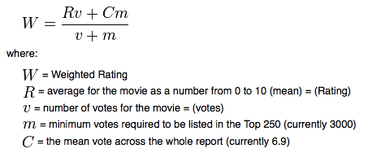

In [ ]:
#Calculate all the components based on the above formula
R = movies_cleaned_df["vote_average"]
v = movies_cleaned_df["vote_count"]
M = movies_cleaned_df["vote_count"].quantile(0.70)
C = movies_cleaned_df["vote_average"].mean()

In [ ]:
#applying the weighted average formula
movies_cleaned_df["weighted_average"] = ((R * v) + ( C * M )) / ( v + M)

In [ ]:
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.099512
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.740537
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.275212
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.423395
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.134364


In [ ]:
#sorting the movies dataset in descending order based on the weighted average
movies_sorted_ranking = movies_cleaned_df.sort_values('weighted_average', ascending=False)
movies_sorted_ranking[["original_title", "vote_count", "vote_average", "weighted_average", "popularity"]].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
662,Fight Club,9413,8.3,8.043269,146.757391
65,The Dark Knight,12002,8.2,8.003023,187.322927
96,Inception,13752,8.1,7.934580,167.583710
809,Forrest Gump,7927,8.2,7.916070,138.133331
95,Interstellar,10867,8.1,7.895370,724.247784
329,The Lord of the Rings: The Return of the King,8064,8.1,7.834144,123.630332
1818,Schindler's List,4329,8.3,7.811568,104.469351
262,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,7.764199,138.049577
1553,Se7en,5765,8.1,7.747684,79.579532
330,The Lord of the Rings: The Two Towers,7487,8.0,7.731530,106.914973


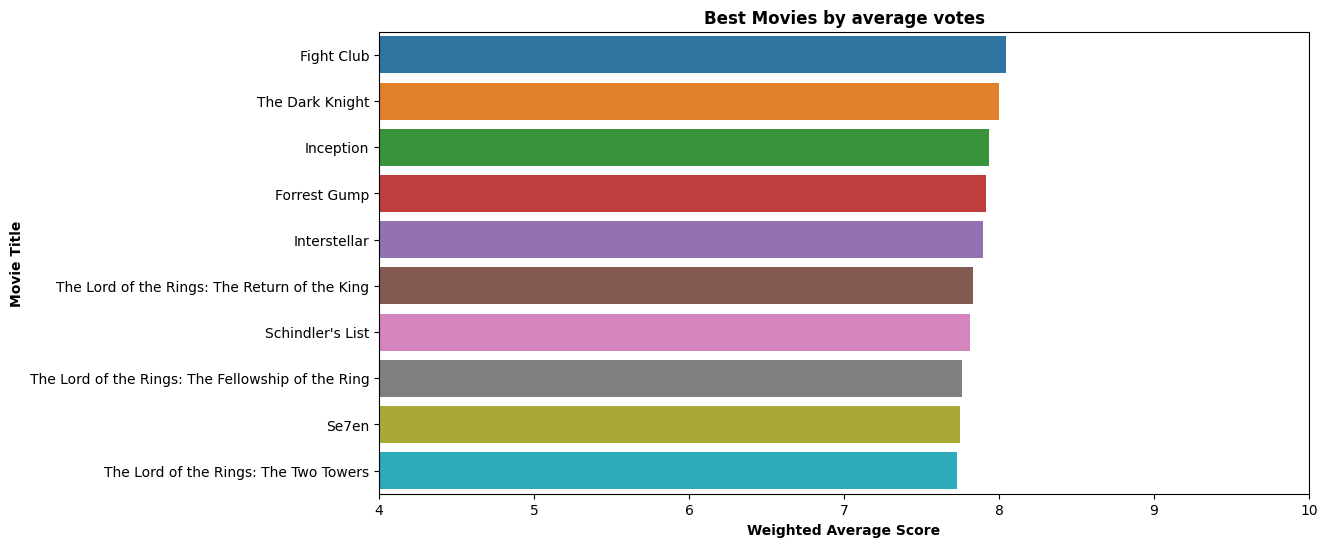

In [ ]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

weight_average = movies_sorted_ranking.sort_values("weighted_average", ascending=False)
plt.figure(figsize = (12, 6))
axis1 = sns.barplot(x = weight_average['weighted_average'].head(10), y = weight_average['original_title'].head(10))
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

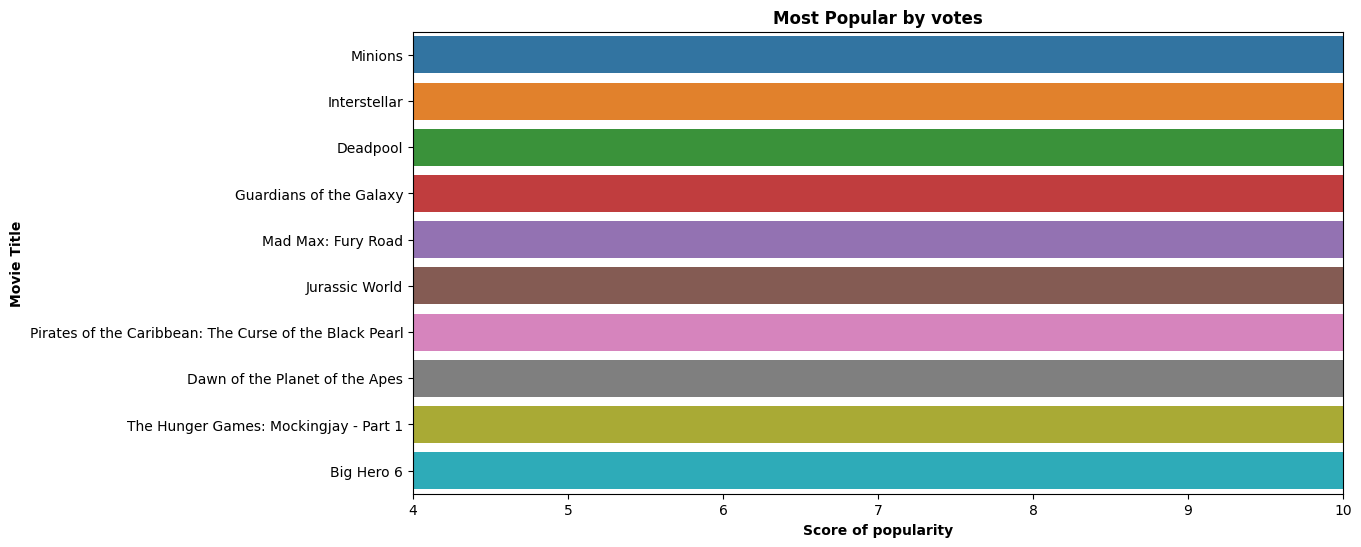

In [ ]:
#plotting
popularity = movies_sorted_ranking.sort_values("popularity", ascending=False)
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = popularity['popularity'].head(10), y = popularity['original_title'].head(10), data = popularity)
plt.xlim(4, 10)
plt.title('Most Popular by votes', weight='bold')
plt.xlabel('Score of popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('porpular_movies.png')

**Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)**

In [ ]:
popularity.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.353456
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.895370
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.271727
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",7.698143
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What a Lovely Day.,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",7.077291


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaling the weighted average and popularity becauses of units difference
scaling = MinMaxScaler()
movie_scaled_df = scaling.fit_transform(movies_cleaned_df[['weighted_average', 'popularity']])
movie_normalized_df = pd.DataFrame(movie_scaled_df, columns = ['weighted_average', 'popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.684515,0.171695
1,0.564515,0.158724
2,0.408963,0.122508
3,0.792785,0.128146
4,0.361880,0.050031


In [ ]:
#joining the movie_normalied_df into the movies_cleaned_df as new cols
movies_cleaned_df[['normalized_weight_average', 'normalized_popularity']] = movie_normalized_df

In [ ]:
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average,normalized_weight_average,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.099512,0.684515,0.171695
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.740537,0.564515,0.158724
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.275212,0.408963,0.122508
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.423395,0.792785,0.128146
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.134364,0.361880,0.050031


In [ ]:
#given 50 percent importance to both the normalized weight average and normalized popularity
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending = False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head()

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.950559,0.827137,0.888848
546,Minions,0.435119,1.000000,0.717560
94,Guardians of the Galaxy,0.884629,0.549397,0.717013
788,Deadpool,0.742084,0.587630,0.664857
65,The Dark Knight,0.986546,0.213827,0.600187


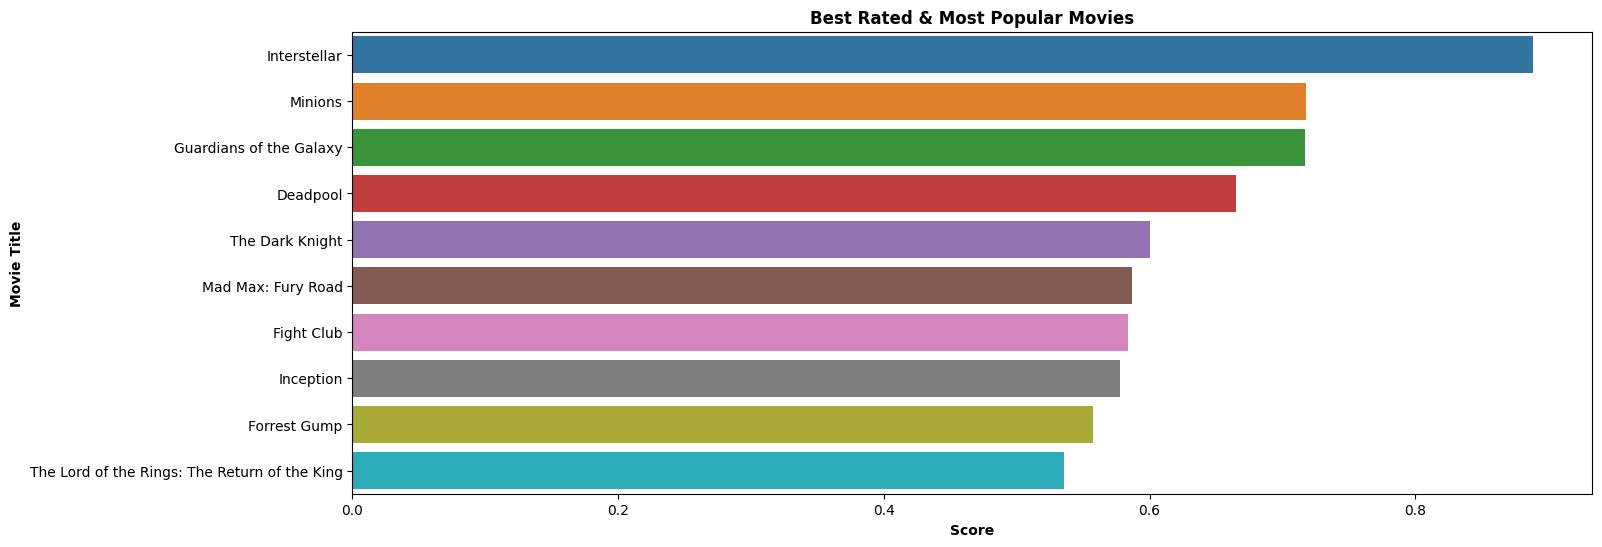

In [ ]:
#plotting
scored_df = movies_cleaned_df.sort_values("score", ascending=False)

plt.figure(figsize = (16, 6))

ax = sns.barplot(x = scored_df['score'].head(10), y = scored_df['original_title'].head(10), data = scored_df)

# plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Movies', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')